# Course work

0. Import the libraries that you will need
```
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```
1. Get the data - in the cell below run: **Note** you only need to run this command the first time you do the exercise. If you save and go away and come back, then can skip straight to step 2.
```
!python get-my-data.py
```
2. Read in the csv:
```
df = pd.read_csv('coursework-data.csv')
```
3. Perform some exploratory data analysis to clean up the dataset. The code needed for this part is found in the first set of exercises that you did. 
    - Remove outliers
    - If any pairs of variables are highly correlated, remove one of the pair - highly correlated in this case > 0.99

4. Fit a baseline model, linear regression to map the control parameters (all parameters *except* `gllbsc_gap`) to the dependent parameter `gllbsc_gap`. Summarise its performance. 

To set up the data use:
```
x = df.loc[:, df.columns != "gllbsc_gap"].values
y = df.loc[:, df.columns == "gllbsc_gap"].values
```
The rest of the code you need for this found in the second set of exercises that you did. 

- From looking at the linear regression model, which features have the greatest influence on the band gap?


5. Develop a gradient boosted regressor to the same data. Summarise its performance.

## <span style="color:red"> Important notes</span>

### Submitting the coursework

When you are finished with the coursework - use `File > Save and Export Notebook As > pdf` to download a pdf of the completed notebook. Submit this pdf _via_ the portal on QMplus. 

<span style="color:red"> The deadline for submission is Sunday, 24 March 2024, 11:59 PM.</span>

### Text explanations

**Please please please** add text to explain what you are doing in the code. Adding text boxes is easy, just add a new cell as normal then change the type to `Markdown` with the dropdown menu at the top of the cells. Adding text will make sure that markers can give you proper grades even if you make a small slip in your code. If you have no text explanation and still have a small slip, **you will likely get no marks**!

### Datasets

All of your datasets are generated randomly. So do not expect the same answers as your friends. If you compare answers and find that you have something very different, do not worry.

### Warnings from the code

Don't worry if the code throws some warnings sometimes. If it keeps running then it is fine. Warnings usually just alert you to future planned changes in the code you are using.

### Long run times

There is a certain part of the exercise where a grid search is required. It could take quite a long time with this code. I have tested it and it took about 15 minutes for a 10-fold cross validation on a 5x5 gridsearch. Dont worry if it seems to be running for a long time, that's okay.

# Import Libraries 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!python get-my-data.py

File already exists no more to see here.


# Load Data 


In [4]:
df = pd.read_csv('coursework-data.csv')

In [5]:
print(len(list(df.columns)))

16


In [6]:
column_names = list(df.columns)
print(column_names)

['MeltT dev', 'NValence mean', 'NdValence dev', 'HOMO_energy', 'Weight dev', 'gllbsc_gap', 'CovRad dev', 'Eneg dev', 'MeltT mean', 'GS dev', 'Number dev', 'Spg dev', 'LUMO values', 'GS mean', 'Periodic nature', 'Mendeleev dev']


In [7]:
print(df)

       MeltT dev  NValence mean  NdValence dev  HOMO_energy  Weight dev  \
0     596.434711       4.909091       1.652893    -0.160771   18.519174   
1     991.732893       9.272727       2.644628    -0.338381   51.543246   
2    1320.489796       9.714286       1.224490    -0.338381   67.325910   
3     546.606942       7.090909       2.826446    -0.273634   48.630545   
4     283.151250       7.000000       3.750000    -0.338381   36.772863   
..           ...            ...            ...          ...         ...   
744   464.473373       6.461538       2.603550    -0.338381   45.616776   
745   667.750000       6.250000       2.187500    -0.338381   34.121112   
746   577.875000       5.250000       2.187500    -0.197497   53.511675   
747   708.646944       4.666667       0.000000    -0.338381   18.375224   
748  1050.770250       6.900000       0.765000    -0.338381   41.178064   

     gllbsc_gap  CovRad dev  Eneg dev  MeltT mean     GS dev  Number dev  \
0      3.178134   50.87

# Removing Outliers 

To determine the upper and lower limits of the data, the mean serves as a central reference point. The standard deviation measures the spread of the data around the mean, and it is typically multiplied by 3. Multiplying by 3 is often used in statistics to set boundaries .This include most data points, especially  if the data follows a normal distribution.
To establish the upper limit, the mean is added by three times the standard deviation. This approach includes nearly all data points within its range.
Likewise, for the lower limit the mean is subtracted an by three times the standard deviation. This method includes nearly all data points within its range.
After calculating the upper and lower limit , any data points that falls above the upper limit or below the lower limit were removed. This helps to filter out potential outliers and focuses the analysis on the majority of the data set.

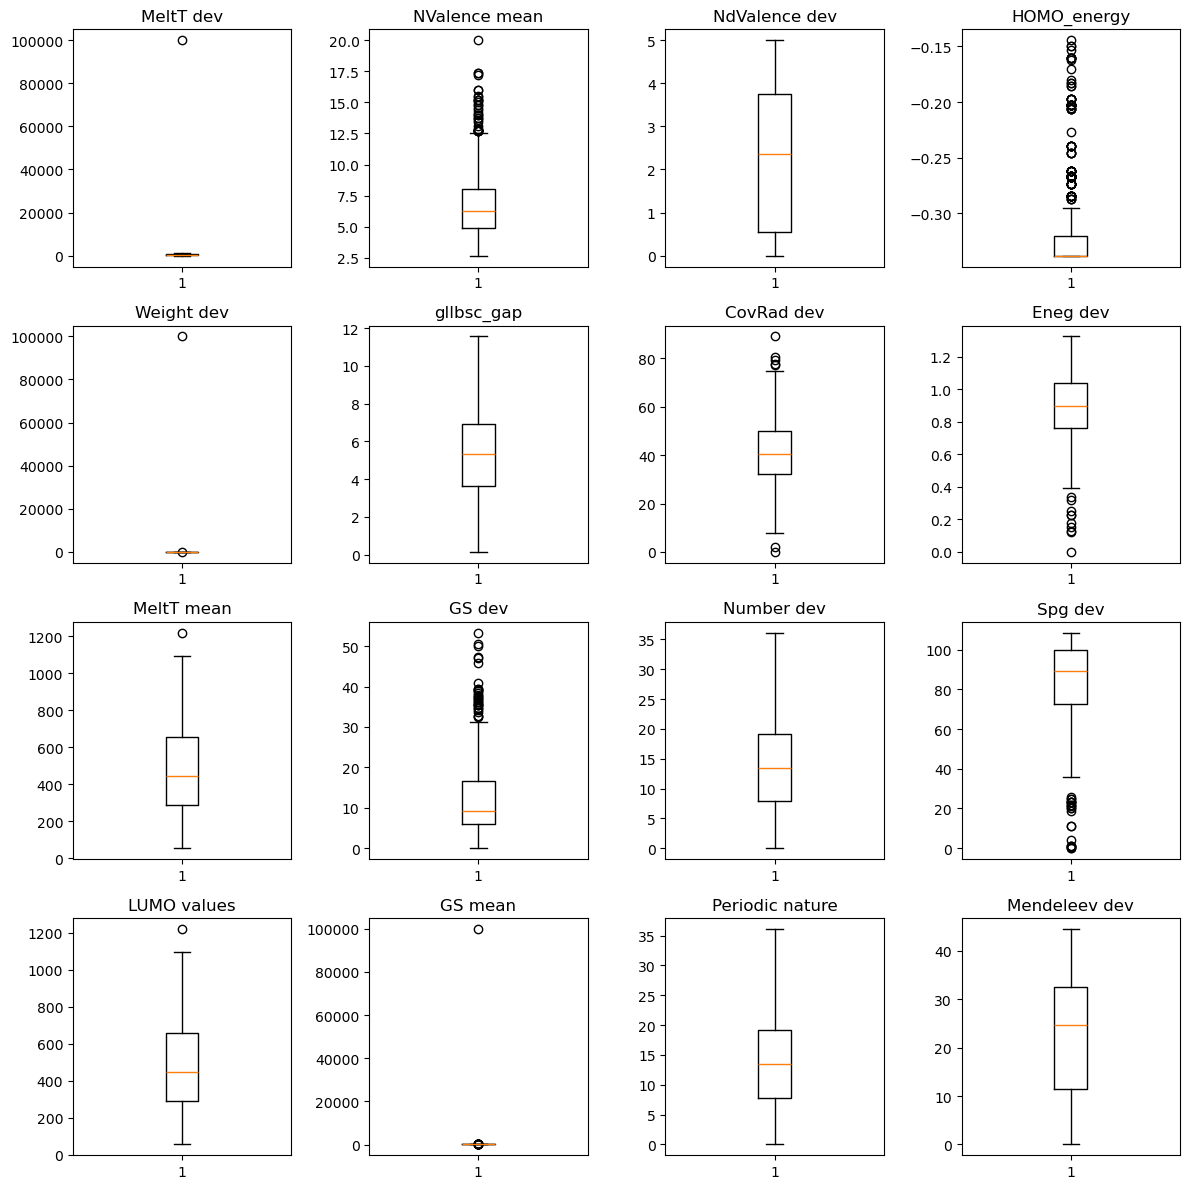

In [314]:
column_names = list(df.columns)
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
for i in range(4):
    for j in range(4):
        data = df[df.columns[4*i + j]].values
        ax[i, j].boxplot(data)
        ax[i, j].set_title(df.columns[4*i + j])
plt.tight_layout()

In [315]:
upper_limit = df['NValence mean'].mean() + 3*df['NValence mean'].std()
lower_limit = df['NValence mean'].mean() - 3*df['NValence mean'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 14.787024873627331
lower limit: -0.9869480763941354


In [316]:
df.drop(df[(df['NValence mean'] >= upper_limit) | (df['NValence mean'] <= lower_limit)].index, inplace=True)

In [317]:
upper_limit1 = df['Eneg dev'].mean() + 3*df['Eneg dev'].std()
lower_limit1 = df['Eneg dev'].mean() - 3*df['Eneg dev'].std()
print('upper limit1:', upper_limit1)
print('lower limit1:', lower_limit1)

upper limit1: 1.4885433770549295
lower limit1: 0.27976569026790565


In [318]:
df.drop(df[(df['Eneg dev'] >= upper_limit1) | (df['Eneg dev'] <= lower_limit1)].index, inplace=True)

In [319]:
upper_limit2 = df['CovRad dev'].mean() + 3*df['CovRad dev'].std()
lower_limit2 = df['CovRad dev'].mean() - 3*df['CovRad dev'].std()
print('upper limit2:', upper_limit2)
print('lower limit2:', lower_limit2)

upper limit2: 78.62966751124799
lower limit2: 5.118397650677792


In [320]:
df.drop(df[(df['CovRad dev'] >= upper_limit2) | (df['CovRad dev'] <= lower_limit2)].index, inplace=True)

In [321]:
upper_limit3 = df['Weight dev'].mean() + 3*df['Weight dev'].std()
lower_limit3 = df['Weight dev'].mean() - 3*df['Weight dev'].std()
print('upper limit3:', upper_limit3)
print('lower limit3:', lower_limit3)

upper limit3: 11302.233049238748
lower limit3: -10958.572455776357


In [322]:
df.drop(df[(df['Weight dev'] >= upper_limit3) | (df['Weight dev'] <= lower_limit3)].index, inplace=True)

In [323]:
upper_limit4 = df['GS dev'].mean() + 3*df['GS dev'].std()
lower_limit4 = df['GS dev'].mean() - 3*df['GS dev'].std()
print('upper limit4:', upper_limit4)
print('lower limit4:', lower_limit4)

upper limit4: 38.13870918709728
lower limit4: -13.64999154927504


In [324]:
df.drop(df[(df['GS dev'] >= upper_limit4) | (df['GS dev'] <= lower_limit4)].index, inplace=True)

In [325]:
upper_limit5 = df['Spg dev'].mean() + 3*df['Spg dev'].std()
lower_limit5 = df['Spg dev'].mean() - 3*df['Spg dev'].std()
print('upper limit5:', upper_limit5)
print('lower limit5:', lower_limit5)

upper limit5: 144.92653636311434
lower limit5: 23.889308368093666


In [326]:
df.drop(df[(df['Spg dev'] >= upper_limit5) | (df['Spg dev'] <= lower_limit5)].index, inplace=True)

In [327]:
upper_limit6 = df['GS mean'].mean() + 3*df['GS mean'].std()
lower_limit6 = df['GS mean'].mean() - 3*df['GS mean'].std()
print('upper limit6:', upper_limit6)
print('lower limit6:', lower_limit6)

upper limit6: 11457.932146985007
lower limit6: -11134.980973474034


In [328]:
df.drop(df[(df['GS mean'] >= upper_limit6) | (df['GS mean'] <= lower_limit6)].index, inplace=True)

In [329]:
upper_limit7 = df['HOMO_energy'].mean() + 3*df['HOMO_energy'].std()
lower_limit7 = df['HOMO_energy'].mean() - 3*df['HOMO_energy'].std()
print('upper limit7:', upper_limit7)
print('lower limit7:', lower_limit7)

upper limit7: -0.1948803201564301
lower limit7: -0.4429946542753881


In [330]:
df.drop(df[(df['HOMO_energy'] >= upper_limit7) | (df['HOMO_energy'] <= lower_limit7)].index, inplace=True)

In [331]:
upper_limit8 = df['MeltT dev'].mean() + 3*df['MeltT dev'].std()
lower_limit8 = df['MeltT dev'].mean() - 3*df['MeltT dev'].std()
print('upper limit8:', upper_limit8)
print('lower limit8:', lower_limit8)

upper limit8: 12062.940252811852
lower limit8: -10757.7184950029


In [332]:
df.drop(df[(df['MeltT dev'] >= upper_limit8) | (df['MeltT dev'] <= lower_limit8)].index, inplace=True)

In [333]:
upper_limit9 = df['MeltT mean'].mean() + 3*df['MeltT mean'].std()
lower_limit9 = df['MeltT mean'].mean() - 3*df['MeltT mean'].std()
print('upper limit9:', upper_limit9)
print('lower limit9:', lower_limit9)

upper limit9: 1135.1114431902834
lower limit9: -159.80508951526554


In [334]:
df.drop(df[(df['MeltT mean'] >= upper_limit9) | (df['MeltT mean'] <= lower_limit9)].index, inplace=True)

In [335]:
upper_limit10 = df['LUMO values'].mean() + 3 * df['LUMO values'].std()
lower_limit10 = df['LUMO values'].mean() - 3 * df['LUMO values'].std()
print('upper limit10:', upper_limit10)
print('lower limit10:', lower_limit10)

upper limit10: 1129.0375756039325
lower limit10: -155.8680931334701


In [336]:
df.drop(df[(df['LUMO values'] >= upper_limit10) | (df['LUMO values'] <= lower_limit10)].index, inplace=True)

Checking the box plot to see if the outliers are removed

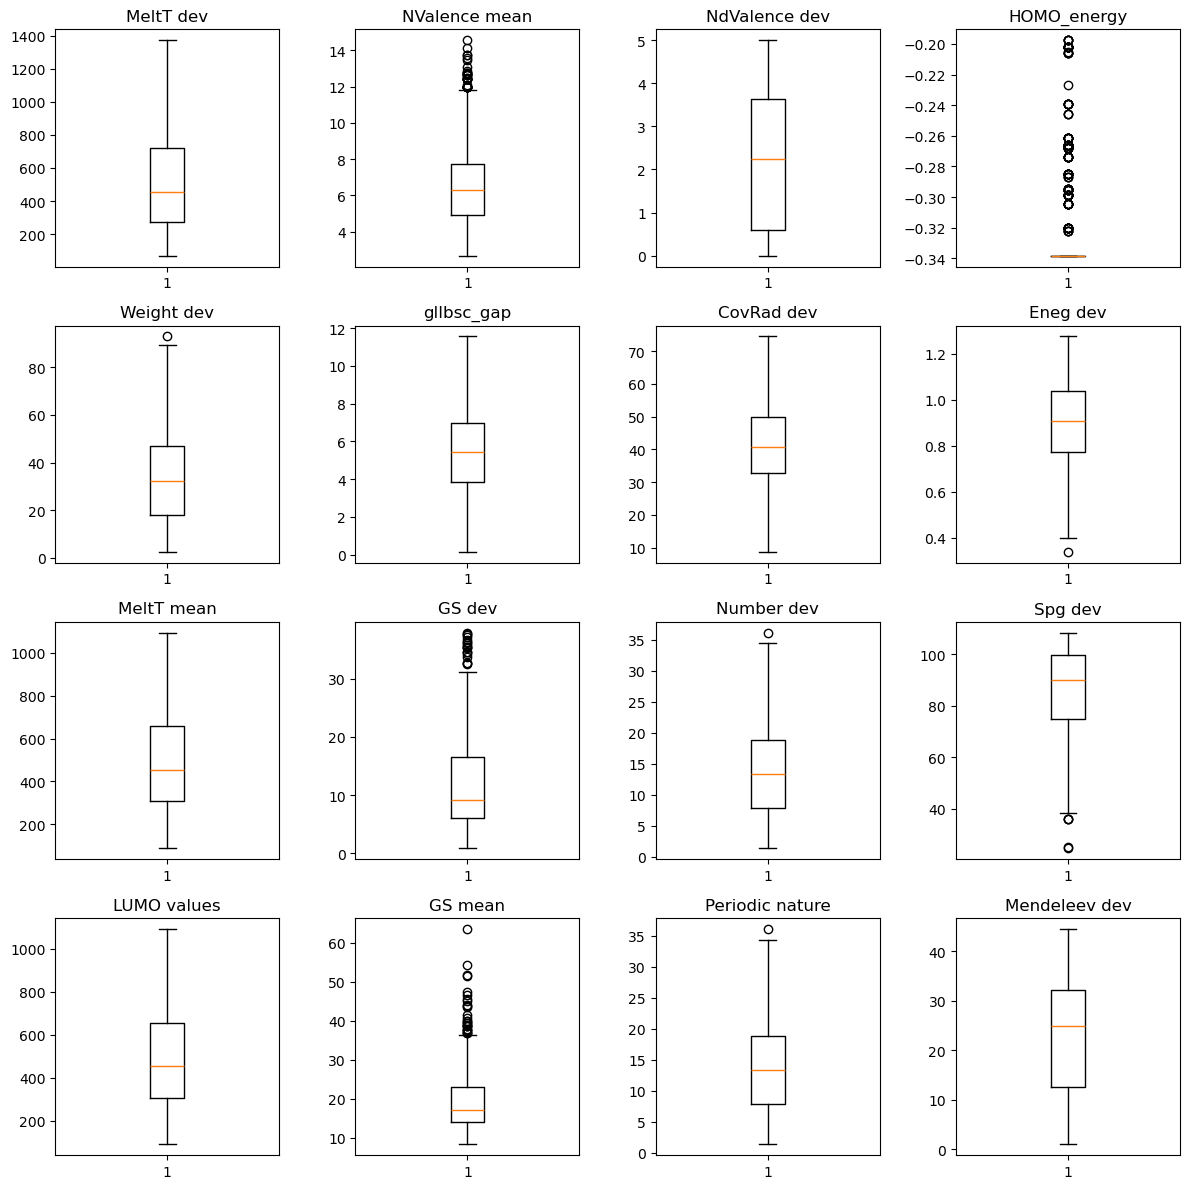

In [337]:
column_names = list(df.columns)
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
for i in range(4):
    for j in range(4):
        data = df[df.columns[4*i + j]].values
        ax[i, j].boxplot(data)
        ax[i, j].set_title(df.columns[4*i + j])
plt.tight_layout()

# Removing Coreation


Different codes are used to visualize the code .Initial code calculates the correlation matrix for the numerical data in the DataFrame by df.corr() and stores it in the variable corrmat. Secondly another code generates a heatmap  of the correlation matrix for easy visualization of the relationships between variables in the DataFrame.Thirdly.the code helps to identify columns in a dataset that exhibit high correlation with each other based on a given threshold value.The length of highly correlated columns is identified by len(set(corr_features)) and the names of the highly correlated matrix identified by corr_features.The highly correlated columns are removed by using df.drop


In [293]:
corrmat = df.corr()
corrmat

,MeltT dev,NValence mean,NdValence dev,HOMO_energy,Weight dev,gllbsc_gap,CovRad dev,Eneg dev,MeltT mean,GS dev,Number dev,Spg dev,LUMO values,GS mean,Periodic nature,Mendeleev dev
MeltT dev,1.000000,-0.040437,-0.283974,0.074294,0.107571,-0.015070,0.021962,-0.092882,0.931745,-0.248696,0.112010,0.278444,0.931745,-0.357113,0.112010,-0.124739
NValence mean,-0.040437,1.000000,0.766314,0.191145,0.754803,-0.487373,-0.231997,-0.561800,-0.058971,-0.210114,0.752037,-0.359882,-0.058971,-0.148385,0.752037,-0.529102
NdValence dev,-0.283974,0.766314,1.000000,0.316309,0.488769,-0.619554,-0.205946,-0.418862,-0.209783,-0.120102,0.501087,-0.242828,-0.209783,-0.017044,0.501087,-0.371723
HOMO_energy,0.074294,0.191145,0.316309,1.000000,0.131928,-0.449235,-0.029932,-0.171904,0.303536,-0.106437,0.135877,0.043197,0.303536,0.047927,0.135877,0.011069
Weight dev,0.107571,0.754803,0.488769,0.131928,1.000000,-0.490175,0.270964,-0.187182,0.084921,0.120008,0.998867,-0.060715,0.084921,0.112085,0.998867,-0.183610
gllbsc_gap,-0.015070,-0.487373,-0.619554,-0.449235,-0.490175,1.000000,-0.094412,0.178780,-0.094881,0.078910,-0.500352,-0.057888,-0.094881,-0.010640,-0.500352,0.102319
CovRad dev,0.021962,-0.231997,-0.205946,-0.029932,0.270964,-0.094412,1.000000,0.669878,0.046994,0.762835,0.278003,0.437199,0.046994,0.700298,0.278003,0.654788
Eneg dev,-0.092882,-0.561800,-0.418862,-0.171904,-0.187182,0.178780,0.669878,1.000000,-0.029653,0.483703,-0.188022,0.651698,-0.029653,0.471066,-0.188022,0.824847
MeltT mean,0.931745,-0.058971,-0.209783,0.303536,0.084921,-0.094881,0.046994,-0.029653,1.000000,-0.227260,0.089207,0.348854,1.000000,-0.250065,0.089207,-0.010734
GS dev,-0.248696,-0.210114,-0.120102,-0.106437,0.120008,0.078910,0.762835,0.483703,-0.227260,1.000000,0.122992,0.225840,-0.227260,0.889521,0.122992,0.486458


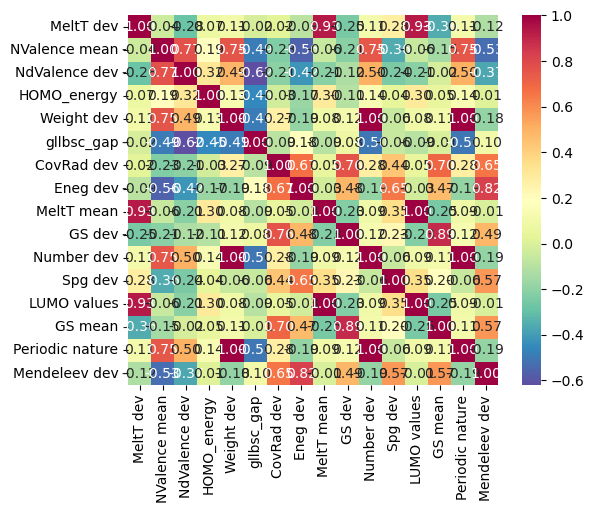

In [294]:
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

An empty set named col_corr is initialized to save the names of highly correlated columns.The correlation matrix `corr_matrix` is calculated for the data set using the .corr() method available for DataFrames in Python.Two nested loops iterate over the upper triangle of the correlation matrix, excluding the diagonal elements.The outer loop iterates over the columns of the correlation matrix.The inner loop iterates over the columns preceding the current column in the outer loop.If the  value of the correlation coefficient between two columns exceeds the given threshold of 0.99,their names are added to the col_corr set.


In [295]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [296]:
corr_features = correlation(df, 0.99)
len(set(corr_features))

3

In [297]:
corr_features

{'LUMO values', 'Number dev', 'Periodic nature'}

Lumo values,Number dev and periodic nature are removed as they are having correlation related to 0.99,Number_dev and periodic nature have a correlation of 1. LUMO values and MELtT mean have correlation of 1 

In [105]:
df.drop(['LUMO values', 'Number dev', 'Periodic nature'], inplace=True, axis=1)

Plotted the heatmap to see if highly correlated columns have been removed 

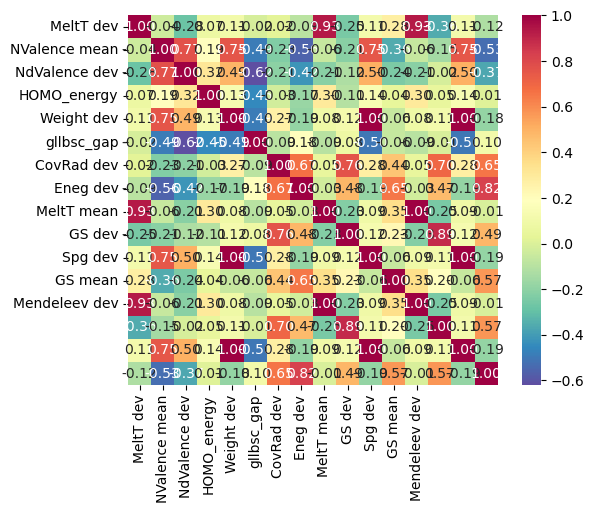

In [106]:
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

# Regression 


The process begins with setting x and y values, followed by standardizing the features (x) and the target variable (y) using the mean and standard deviation. The dataset is then split into a training set and a testing set, where the parameter train_size determines the proportion of data included in the training set. In this code, setting train_size=0.9.This implies that 90% of the data is allocated for training.

Next, a linear regression model is trained using the training data, with the intercept and coefficient of the trained model being determined to establish the relationship between the features and the target variable. Graphs are generated to visualize the relationships between x_train and y_train, as well as between x_test and y_test.

To enhance the model's performance, a gradient boost regression model is utilized with specified hyperparameters. This model is chosen for its ability to handle complex relationships within the data.

Following the training process, the model's performance is evaluated using metrics such as mean squared error (MSE), root mean squared error (RMSE), and r-squared. Lower MSE and RMSE values, along with higher R-squared values, indicate superior model performance and a stronger correlation between the predictors and the target variable.









In [37]:
x = df.loc[:, df.columns != "gllbsc_gap"].values
y = df.loc[:, df.columns == "gllbsc_gap"].values

In [38]:

from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1))

StandardScaler class removes mean and scales to unit variance.fit_transform() is a method to compute mean and standarad deviation for scaling and transforming the input.

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,
                                  train_size=0.9)

In [8]:
df

,MeltT dev,NValence mean,NdValence dev,HOMO_energy,Weight dev,gllbsc_gap,CovRad dev,Eneg dev,MeltT mean,GS dev,Number dev,Spg dev,LUMO values,GS mean,Periodic nature,Mendeleev dev
0,596.434711,4.909091,1.652893,-0.160771,18.519174,3.178134,50.876033,1.090909,601.531818,12.915702,8.528926,105.619835,601.531818,20.010909,8.528926,35.371901
1,991.732893,9.272727,2.644628,-0.338381,51.543246,6.064334,29.884298,0.643967,731.734545,2.109752,20.628099,72.198347,731.734545,10.555455,20.628099,11.107438
2,1320.489796,9.714286,1.224490,-0.338381,67.325910,5.143263,42.448980,0.791837,979.142857,3.679592,26.530612,88.571429,979.142857,11.680714,26.530612,15.918367
3,546.606942,7.090909,2.826446,-0.273634,48.630545,3.833288,53.057851,1.029421,555.856364,17.092314,19.834711,102.545455,555.856364,22.894091,19.834711,29.305785
4,283.151250,7.000000,3.750000,-0.338381,36.772863,3.881077,52.500000,1.002500,337.477500,21.614167,14.750000,92.750000,337.477500,30.719167,14.750000,31.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,464.473373,6.461538,2.603550,-0.338381,45.616776,7.162802,52.355030,0.962840,432.184615,18.415740,18.366864,90.792899,432.184615,23.689231,18.366864,27.479290
745,667.750000,6.250000,2.187500,-0.338381,34.121112,6.588943,36.750000,0.814062,589.000000,12.787344,13.875000,82.031250,589.000000,17.307813,13.875000,17.250000
746,577.875000,5.250000,2.187500,-0.197497,53.511675,3.423648,63.187500,0.973750,825.300000,24.495703,21.500000,89.906250,825.300000,30.929063,21.500000,34.875000
747,708.646944,4.666667,0.000000,-0.338381,18.375224,8.772669,30.875000,0.875972,662.211667,8.815417,7.500000,92.458333,662.211667,14.552500,7.500000,13.222222


In [41]:
from sklearn.linear_model import LinearRegression
# with sklearn
regr = LinearRegression()
regr.fit(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-0.00039817]
Coefficients: 
 [[-0.22146277  0.16443282 -0.59422073 -0.26383338 -0.19305929 -0.433461
   0.1707554   0.24757396  0.40075541 -0.15906406 -0.08041019 -0.01459884]]


By looking at the code ,the feature 2  (-0.59422073) has highest influence  

Text(0, 0.5, 'Predicted value')

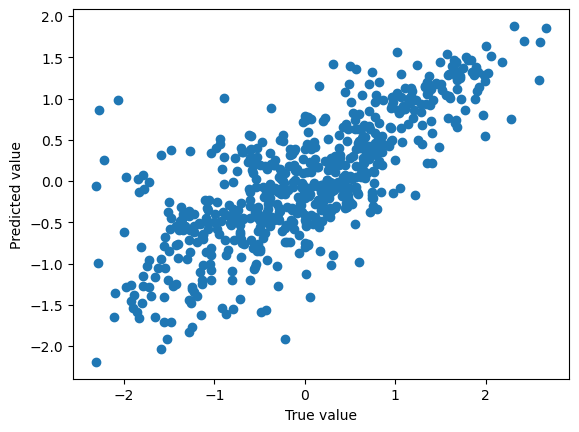

In [42]:
predictions = regr.predict(x_train)
plt.scatter(y_train, predictions)
plt.xlabel('True value')
plt.ylabel('Predicted value')

Text(0, 0.5, 'Predicted value')

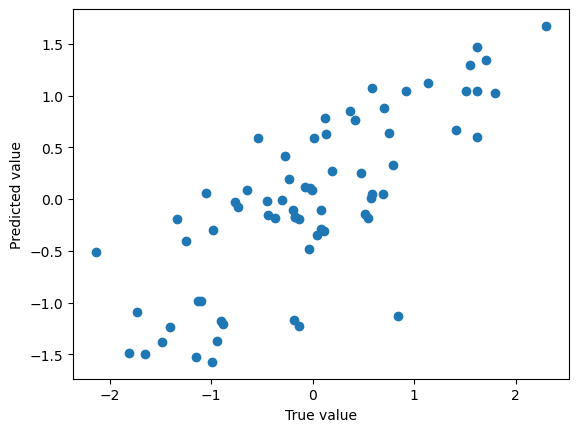

In [43]:
predictions = regr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error:', mean_squared_error(predictions, y_test))
print('Root mean squared error:', mean_squared_error(predictions, y_test, squared=False))
print('r-squared:', r2_score(y_test, predictions))

Mean squared error: 0.37341817513912934
Root mean squared error: 0.6110795162162853
r-squared: 0.6123116808518715


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MSE is 0.37341817513912934 and RMSE is 0.6110795162162853 .Lower values in the error shows less discrepancies between actual value and the predicted value.The r-squared value is  0.6123116808518715. This explains that the regression model accounts for about 61.23% of the variability in the target variable.A value of 1 indicates that the model explains 100% of the variance in the target variable, meaning it perfectly predicts the target variable.The performance of this model could be improved by gradient boost regressor model.

# Gradient Boost Regressor 

Necessary modules are imported into the code like GridSearchCV for hyperparameter tuning and GradientBoostingRegressor for the regression model.
param_grid is defined specifying the hyperparameters such as max_depth,n_estimator,learning_rate with their respective value.
GridSearchCV is used to perform hyperparameter tuning. It takes the base model (gradientregressor), the parameter grid (param_grid), cross-validation strategy (cv=5 for 5-fold cross-validation), and the scoring metric (scoring='r2' for R-squared) as inputs.
Next,grid_search is fit into the model using fit().The best parameters are obtained using best_params attribute of the grid_search object.
Another example of GradientBoostingRegressor called best_gradientregressor is created using the best parameters obtained from the tuning process. fit() method is called on best_gradientregressor to fit the model to the training data (x_train and y_train).In this way prediction is made on x_train using the fitted model.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Defined the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Instantiate the GradientBoostingRegressor
gradientregressor = GradientBoostingRegressor()

# Used GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gradientregressor, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Instantiate the GradientBoostingRegressor with the best parameters
best_gradientregressor = GradientBoostingRegressor(**best_params)

# Fit the model to the training data
best_gradientregressor.fit(x_train, y_train)

# Make predictions
y_pred = best_gradientregressor.predict(x_test)

# Evaluated the model
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root mean squared error:', mean_squared_error(y_test, y_pred, squared=False))
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

Mean squared error: 0.244589464194045
Root mean squared error: 0.49455986917060407
R-squared (R2): 0.7460635700996593


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



The Gradient Boosting Regressor model led to an improvement in the model's performance. Initially, the mean squared error (MSE) was 0.37341817513912934. After applying Gradient Boosting Regression, the MSE decreased to 0.244589464194045. Similarly, the root mean squared error (RMSE) was 0.6110795162162853.After applying Gradient Boosting Regression,the RMSE decreased to  0.49455986917060407. The reduction in the error value signifies the proximity of the predicted values to the actual values.

The R-squared value improved from 0.6123116808518715 to 0.7460635700996593. This increase indicates that the model now explains approximately 74.6% of the variability observed in the target variable, representing a substantial enhancement in predictive performance.